In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1

        Rank                Channel Name       Category  Subscribers  \
1        1.0                    T-Series  Music & Dance  258400000.0   
2        2.0                     MrBeast    Video games  236100000.0   
3        3.0  Cocomelon - Nursery Rhymes      Education  171400000.0   
4        4.0                   SET India            NaN  167100000.0   
5        5.0           ✿ Kids Diana Show      Animation  118500000.0   
...      ...                         ...            ...          ...   
1041   996.0                   BBC Earth            NaN   12500000.0   
1042   997.0                Jamie Nyland      Animation   12500000.0   
1043   998.0              janin al chair            NaN   12500000.0   
1044   999.0                 Myke Towers  Music & Dance   12500000.0   
1045  1000.0                   HikakinTV          Humor   12500000.0   

            Country  Average Views  Average Likes  Average Comments  \
1             India            NaN            NaN             22

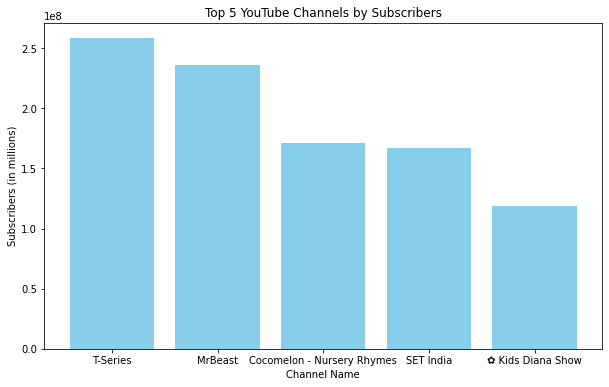

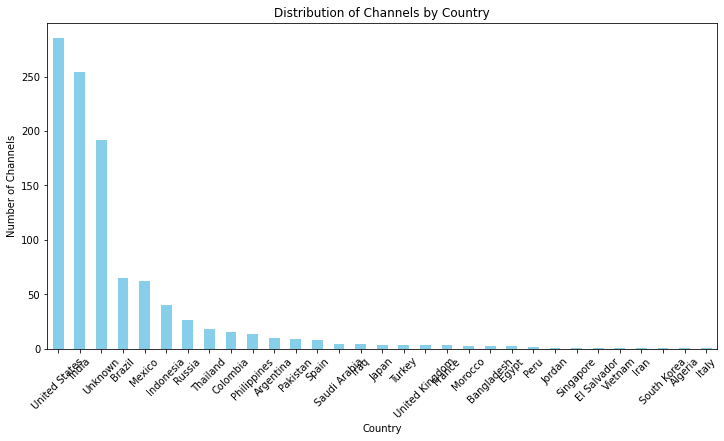

In [3]:
#1.

df=pd.read_csv("Youtuber.csv")
df = df.dropna(subset=['Channel Name'])
df['Country'].fillna('Unknown', inplace=True)
df['Content Type'].fillna('Unknown', inplace=True)
df['Subscribers'] = pd.to_numeric(df['Subscribers'].astype(str).str.rstrip('M'), errors='coerce') * 1e6
df[['Average Views', 'Average Likes', 'Average Comments']] = df[['Average Views', 'Average Likes', 'Average Comments']].apply(pd.to_numeric, errors='coerce')
print(df)
top_subscribers = df.nlargest(5, 'Subscribers')[['Channel Name', 'Subscribers', 'Country']]
print("Top 5 Channels by Subscribers:")
print(top_subscribers)

plt.figure(figsize=(10, 6))
plt.bar(top_subscribers['Channel Name'], top_subscribers['Subscribers'], color='skyblue')
plt.title('Top 5 YouTube Channels by Subscribers')
plt.xlabel('Channel Name')
plt.ylabel('Subscribers (in millions)')
plt.show()

country_counts = df['Country'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Channels by Country')
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45)
plt.show()

# 2

In [57]:
#2 

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('FIFA19.csv')

# Filter the data to include only the 'Name', 'Age', 'Nationality', 'Club', 'Value', 'Wage', and 'Overall' columns
df = df[['Name', 'Age', 'Nationality', 'Club', 'Value', 'Wage', 'Overall']]

# Drop any rows with missing values
df = df.dropna()

# Print the first 5 rows of the filtered DataFrame
print(df.head())

# Calculate summary statistics for the 'Age', 'Value', 'Wage', and 'Overall' columns
print(df[['Age', 'Value', 'Wage', 'Overall']].describe())


                Name  Age Nationality                 Club    Value   Wage  \
0           L. Messi   31   Argentina         FC Barcelona  €110.5M  €565K   
1  Cristiano Ronaldo   33    Portugal             Juventus     €77M  €405K   
2          Neymar Jr   26      Brazil  Paris Saint-Germain  €118.5M  €290K   
3             De Gea   27       Spain    Manchester United     €72M  €260K   
4       K. De Bruyne   27     Belgium      Manchester City    €102M  €355K   

   Overall  
0       94  
1       94  
2       92  
3       91  
4       91  
                Age       Overall
count  18147.000000  18147.000000
mean      25.121122     66.253926
std        4.669796      6.913320
min       16.000000     46.000000
25%       21.000000     62.000000
50%       25.000000     66.000000
75%       28.000000     71.000000
max       45.000000     94.000000


# 3

In [ ]:
#2 A
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create a dataframe with salary and EMI information
df = pd.DataFrame({
    'Cust_ID': [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15],
    'Salary': [1000, 1100, 10000, 1000, 11000, 1110,21000, 30000,2100,33000,21000,21000,25000,21000,45000,],
    'EMI': [0, 0, 0, 1, 1, 1,0, 0, 0, 1, 1, 1,1,1,1]
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Salary']], df['EMI'], test_size=0.2, random_state=42)

# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 2 A

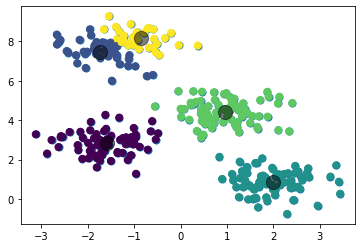

In [36]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a random dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=50);

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# 2B

In [55]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

#Load the Dataset
#convert the dataset into a pandas data frame
data = pd.read_csv("daimonds.csv")
data=data.drop(["cut","color","clarity"],axis=1)
#display the head (first 5 rows) of the dataset
data.head()

data.head()

data.info()


df=data
print(df.head())

#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(df)

data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   depth       53940 non-null  float64
 3   table       53940 non-null  float64
 4   price       53940 non-null  int64  
 5   x           53940 non-null  float64
 6   y           53940 non-null  float64
 7   z           53940 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 3.3 MB
   Unnamed: 0  carat  depth  table  price     x     y     z
0           0   0.23   61.5   55.0    326  3.95  3.98  2.43
1           1   0.21   59.8   61.0    326  3.89  3.84  2.31
2           2   0.23   56.9   65.0    327  4.05  4.07  2.31
3           3   0.29   62.4   58.0    334  4.20  4.23  2.63
4           4   0.31   63.3   58.0    335  4.34  4.35  2.75


PC1          PC2       PC3
0 -26575.507876 -5839.975986 -2.384917
1 -26574.511423 -5839.892418  3.831873
2 -26573.598226 -5838.812270  8.508632
3 -26573.184506 -5831.753645  0.241763
4 -26572.271261 -5830.673777 -0.007814

In [40]:
data.head()

Sno     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  6:00 PM               Kerala                       1   
1    2  6:00 PM               Kerala                       1   
2    3  6:00 PM               Kerala                       2   
3    4  6:00 PM               Kerala                       3   
4    5  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [ ]:
df=pd.read_csv("covid_19_india.csv")

df.head()

cf=pd.pivot_table(df,index="State/UnionTerritory",values=["Cured","Deaths","Confirmed"],aggfunc="sum").reset_index()



cf.head()

cf1

cf1.shape[0]



import seaborn as sns



cf1=cf[cf["State/UnionTerritory"]=="Rajasthan"]
cf1=cf1.T
c=(cf1.columns)
print(c[0])
cf1=cf1.reset_index()
cf1=cf1[cf1["index"]!="State/UnionTerritory"]
print(cf1.columns)
sns.barplot(data=cf1,x="index",y=c[0])

state=input("Please enter state")
cf1=cf[cf["State/UnionTerritory"]==state].reset_index()
if(cf1.shape[0]==0):
    print("please enter correct state")
else:
    cf1=cf1.drop("index",axis=1)
    cf1=cf1.T.reset_index()
    cf1=cf1[cf1["index"]!="State/UnionTerritory"]
    print(cf1.columns)
    sns.barplot(data=cf1,x="index",y=0)

cf1

cf1.shape[0]

df.head()

a="2020-01-30"

a[0:4]+a[5:7]

df["YearMonth"]

df.dtypes

df=df.astype({"Date":"datetime64[ns]"})

df.dtypes

df["Year"]=df["Date"].dt.year

df.head()

df["Month"]=df["Date"].dt.month

df.head()

df.dtypes

df=df.astype({"Year":"str","Month":"str"})

df["Yearmonth"]=df["Year"]+"-"+df["Month"]

df.head()

df1=df[df["State/UnionTerritory"]=="Maharashtra"]
cf=pd.pivot_table(df1,index="Yearmonth",values="Cured",aggfunc="sum")

cf=cf.reset_index()

cf

cf.columns

sns.barplot(data=cf,x="Yearmonth",y="Cured")

# 3A

<AxesSubplot:xlabel='salary'>

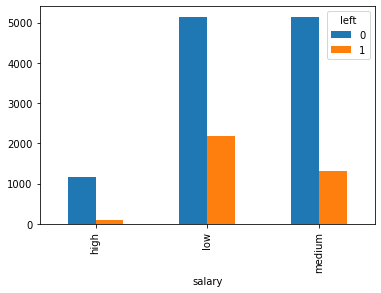

In [6]:
#3. A
df=pd.read_csv("HR_comma_sep.csv")
df
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

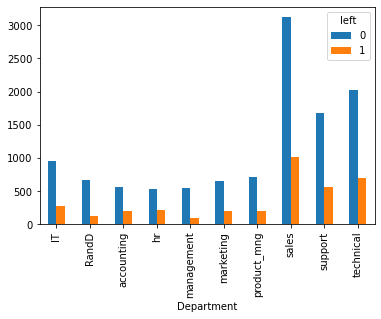

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary",dtype=int)
salary_dummies

salary_high  salary_low  salary_medium
0                0           1              0
1                0           0              1
2                0           0              1
3                0           1              0
4                0           1              0
...            ...         ...            ...
14994            0           1              0
14995            0           1              0
14996            0           1              0
14997            0           1              0
14998            0           1              0

[14999 rows x 3 columns]

In [10]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [11]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [12]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [13]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_predicted=model.predict(X_test)

In [18]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
model.score(X_test,y_test)

0.7703333333333333

# 3B

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
car_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
X=car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'],axis=1)

In [23]:
y=car_df['Car Purchase Amount']

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
y=y.values.reshape(-1,1)

In [26]:
y_scaled = scaler.fit_transform(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,test_size = 0.30)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_predicted=model.predict(X_test)

In [33]:
model.predict(X_train)

array([[0.71489936],
       [0.49903492],
       [0.33068224],
       [0.45261669],
       [0.46026609],
       [0.49284107],
       [0.74270008],
       [0.41795483],
       [0.52749508],
       [0.49840805],
       [0.56408002],
       [0.63167139],
       [0.50725247],
       [0.45708196],
       [0.38927293],
       [0.55070667],
       [0.14824224],
       [0.54058111],
       [0.42371107],
       [0.46358616],
       [0.46215916],
       [0.31750697],
       [0.5474534 ],
       [0.59224293],
       [0.51222625],
       [0.61905001],
       [0.48457758],
       [0.26181368],
       [0.43394936],
       [0.71180616],
       [0.50210413],
       [0.49911045],
       [0.43509834],
       [0.52677034],
       [0.84054088],
       [0.3551515 ],
       [0.50856782],
       [0.56957535],
       [0.4718287 ],
       [0.53432902],
       [0.56862587],
       [0.47469389],
       [0.52661969],
       [0.4379274 ],
       [0.33382546],
       [0.99996895],
       [0.53431031],
       [0.377

In [34]:
model.score(X_test,y_test)

0.9999999849547406